<a href="https://colab.research.google.com/github/Zidannasucha17/it-cert-automation-practice/blob/master/FER2013_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"erlanggasatrioagung","key":"3b87a48f5cff18c3f6741632ec900bfb"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp '/content/kaggle.json' ~/.kaggle/

In [ ]:
 ! chmod 600 /content/kaggle.json

In [ ]:
! kaggle datasets download -d msambare/fer2013 

 76% 46.0M/60.3M [00:00<00:00, 54.8MB/s]
100% 60.3M/60.3M [00:00<00:00, 66.9MB/s]


In [ ]:
!mkdir Dataset
!cp /content/fer2013.zip /content/Dataset


In [17]:
!unzip -q /content/Dataset/fer2013.zip -d /content/Dataset

In [24]:
import matplotlib.image as mpimg
data = '/content/Dataset/train/angry/im0.png'

img = mpimg(data)


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (48, 48)
BATCH_SIZE = 32
train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=img_size,
                                               class_mode='categorical',
                                               batch_size=BATCH_SIZE,
                                               color_mode='grayscale',
                                               subset='training') #setting_training_data

validation_data = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='grayscale',
                                                    subset='validation') #setting_validation_data

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=img_size,
                                             class_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             color_mode='grayscale')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)        

In [23]:
 history = model.fit(
    train_data,
    steps_per_epoch = train_data.samples//BATCH_SIZE,
    epochs = 10,
    validation_data = validation_data,
    validation_steps = validation_data.samples//BATCH_SIZE
    )

Epoch 1/10
717/717 [==============================] - 29s 36ms/step - loss: 1.8257 - accuracy: 0.2412 - val_loss: 1.7686 - val_accuracy: 0.2675
Epoch 2/10
717/717 [==============================] - 25s 35ms/step - loss: 1.7564 - accuracy: 0.2801 - val_loss: 1.7108 - val_accuracy: 0.3135
Epoch 3/10
717/717 [==============================] - 26s 36ms/step - loss: 1.7025 - accuracy: 0.3159 - val_loss: 1.6675 - val_accuracy: 0.3354
Epoch 4/10
717/717 [==============================] - 26s 36ms/step - loss: 1.6620 - accuracy: 0.3465 - val_loss: 1.6369 - val_accuracy: 0.3694
Epoch 5/10
717/717 [==============================] - 25s 35ms/step - loss: 1.6224 - accuracy: 0.3650 - val_loss: 1.5842 - val_accuracy: 0.3843
Epoch 6/10
717/717 [==============================] - 25s 35ms/step - loss: 1.5884 - accuracy: 0.3828 - val_loss: 1.5438 - val_accuracy: 0.4069
Epoch 7/10
717/717 [==============================] - 25s 35ms/step - loss: 1.5580 - accuracy: 0.3984 - val_loss: 1.5176 - val_accuracy:

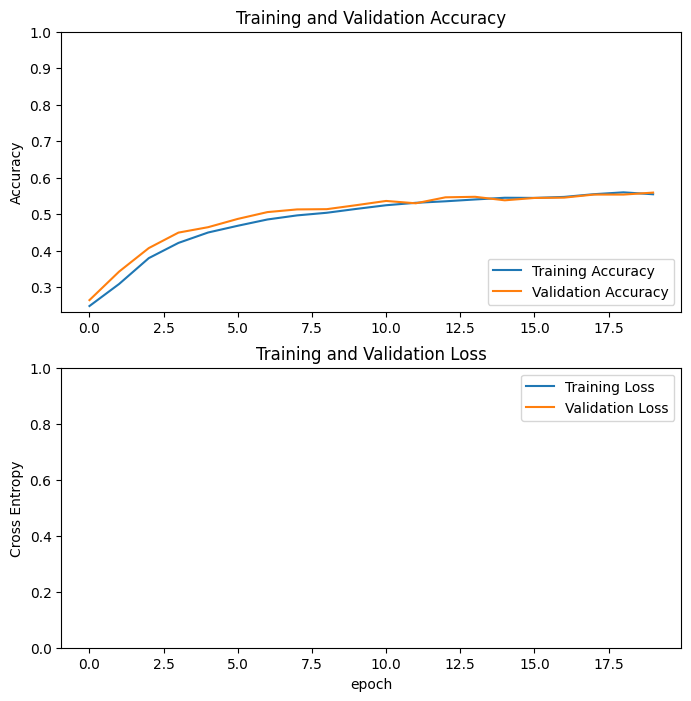

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()